In [74]:
from rich import print as rprint
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
console = Console()

import pandas as pd

start_chunk = 0
end_chunk = start_chunk + 100000
df = pd.read_csv(f'2025_csv/new_amplitude_export_2025_chunk_{start_chunk}_{end_chunk}.csv')
df

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,d888f0cf-d532-4925-b397-4ff9102dc90e,857540411447,591532,Chicago,2025-01-21 21:34:08.373000,2025-01-21 23:39:26.754000,United States,"{'path': '/2/httpapi', 'user_properties_update...",event,iOS,...,18,Web,2025-01-21 23:39:27.311000,Illinois,2025-01-21 23:39:26.754000,2025-01-21 23:39:26.756000,1737495248013,a5093711-4508-4f51-99f7-f7d493cd800a,"{'businessUnit': [], 'initial_utm_medium': 'EM...",28df7af3-96e9-4543-98d1-1abac8c15f59
1,f56164d1-3879-4a7b-ba69-48fc18028b31,857540411447,591532,Chicago,2025-01-21 23:39:20.650000,2025-01-21 23:39:26.754000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,iOS,...,18,Web,2025-01-21 23:39:27.311000,Illinois,2025-01-21 23:39:26.754000,2025-01-21 23:39:26.756000,1737502763521,a5093711-4508-4f51-99f7-f7d493cd800a,"{'businessUnit': [], 'initial_utm_medium': 'EM...",b7f9981a-f97e-4771-9cea-f2f6e50cb30b
2,02c00723-d7c0-4922-af12-07019932367b,857540411447,591532,Chicago,2025-01-21 23:39:22.802000,2025-01-21 23:39:26.754000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,iOS,...,18,Web,2025-01-21 23:39:27.311000,Illinois,2025-01-21 23:39:26.754000,2025-01-21 23:39:26.756000,1737502763521,a5093711-4508-4f51-99f7-f7d493cd800a,"{'businessUnit': [], 'initial_utm_medium': 'EM...",02013519-4992-490a-a85b-b25cd8c384fc
3,80d7b597-ee2c-42b0-8b50-87a802a387ec,857540411447,591532,Chicago,2025-01-21 23:39:22.802000,2025-01-21 23:39:26.754000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,iOS,...,18,Web,2025-01-21 23:39:27.311000,Illinois,2025-01-21 23:39:26.754000,2025-01-21 23:39:26.756000,1737502763521,a5093711-4508-4f51-99f7-f7d493cd800a,"{'businessUnit': [], 'initial_utm_medium': 'EM...",2661fbb0-b5b4-4f77-bd41-53f99eb3b96d
4,cebc3963-bcd9-4cc2-b960-3c126ca4f333,857540411447,591532,Chicago,2025-01-21 23:39:22.986000,2025-01-21 23:39:26.754000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,iOS,...,18,Web,2025-01-21 23:39:27.311000,Illinois,2025-01-21 23:39:26.754000,2025-01-21 23:39:26.756000,1737502763521,a5093711-4508-4f51-99f7-f7d493cd800a,"{'businessUnit': [], 'initial_utm_medium': 'EM...",8b8b1ea9-a01a-44cf-b756-161b684fb7e9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,535b22ed-42ca-45a6-ad7b-cfa007366707,891659633141,591532,Nashville,2025-01-09 17:41:27.346000,2025-01-09 17:41:28.159000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-09 17:41:29.613000,Tennessee,2025-01-09 17:41:28.159000,2025-01-09 17:41:28.162000,1736444484569,5910c50b-575b-43fc-afdf-cb28a8ef8d57,"{'businessUnit': ['UA Queue'], 'initial_utm_me...",6cc13642-fd09-45de-9efa-06ac19fc21fc
99996,9fae7665-231d-4d99-af6e-056c2a86e883,897161885035,591532,Ankeny,2025-01-09 17:48:51.411000,2025-01-09 17:48:52.470000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-09 17:48:54.142000,Iowa,2025-01-09 17:48:52.470000,2025-01-09 17:48:52.472000,1736444929600,e5ac2a78-3cb7-4fab-957d-301ba0bda918,"{'businessUnit': ['AU Group'], 'roles': ['unde...",adc30f31-6295-4a28-ad49-e979aa4eef1b
99997,18a83f7f-979f-42bd-a6b1-0f5c93ffa680,891659633141,591532,Nashville,2025-01-09 17:41:27.349000,2025-01-09 17:41:28.159000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-09 17:41:29.613000,Tennessee,2025-01-09 17:41:28.159000,2025-01-09 17:41:28.162000,1736444484569,5910c50b-575b-43fc-afdf-cb28a8ef8d57,"{'businessUnit': ['UA Queue'], 'initial_utm_me...",5c216433-c4d4-4477-9fff-7031c2eb5582
99998,ade04943-df70-4d95-80bc-f42476286585,897161885035,591532,Ankeny,2025-01-09 17:48:53.798000,2025-01-09 17:48:54.811000,United States,"{'path'

In [75]:
time_cols = ['client_event_time', 'client_upload_time', 'processed_time', 
             'server_received_time', 'server_upload_time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')

df['session_duration'] = (df.groupby('session_id')['client_event_time']
                         .transform(lambda x: x.max() - x.min()))

In [76]:
df['session_duration'].describe()

count                       100000
mean     0 days 00:29:55.580779250
std      0 days 00:29:59.040791332
min                0 days 00:00:00
25%         0 days 00:06:22.753000
50%         0 days 00:26:34.282000
75%         0 days 00:48:15.691000
max         0 days 06:13:40.221000
Name: session_duration, dtype: object

In [77]:
print(df['session_duration'].min())
df[df['session_duration'] == df['session_duration'].min()].shape

0 days 00:00:00


(1304, 31)

In [78]:
# 1. Basic Dataset Information
# https://rich.readthedocs.io/en/stable/appendix/colors.html to refer to colors
console.print("\n[bold bright_green]1. Basic Dataset Information[/bold bright_green]", style="bold")
console.print(Panel(f"Dataset Shape: {df.shape}"))
console.print("\n[bright_yellow]Columns:[/bright_yellow]", df.columns.tolist())
console.print("\n[bright_yellow]Data Types:[/bright_yellow]")
console.print(df.dtypes)
console.print("\n[bright_yellow]Missing Values:[/bright_yellow]")
console.print(df.isnull().sum())

1. Basic Dataset Information

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Dataset Shape: (100000, 31)                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Columns:
[
    '$insert_id',
    'amplitude_id',
    'app',
    'city',
    'client_event_time',
    'client_upload_time',
    'country',
    'data',
    'data_type',
    'device_family',
    'device_id',
    'device_type',
    'dma',
    'event_id',
    'event_properties',
    'event_time',
    'event_type',
    'language',
    'library',
    'os_name',
    'os_version',
    'platform',
    'processed_time',
    'region',
    'server_received_time',
    'server_upload_time',
    'session_id',
    'user_id',
    'user_properties',
    'uuid',
    'session_duration'
]

Data Types:

$insert_id                       object
amplitude_id                      int64
app                               int64
city                             object
client_event_time        datetime64[ns]
client_upload_time       datetime64[ns]
country                          object
data                             object
data_type                        object
device_family                    object
device_id                        object
device_type                      object
dma                              object
event_id                          int64
event_properties                 object
event_time                       object
event_type                       object
language                         object
library                          object
os_name                          object
os_version                        int64
platform                         object
processed_time           datetime64[ns]
region                           object
server_received_time     datetime64[ns]
server_upload_time       datetime64[ns]
session_id                        int64
user_id                          object
user_properties                  object
uuid                             object
session_duration        timedelta64[ns]
dtype: object

Missing Values:

$insert_id                  0
amplitude_id                0
app                         0
city                     1582
client_event_time           0
client_upload_time          0
country                     0
data                        0
data_type                   0
device_family               0
device_id                   0
device_type             16737
dma                     29628
event_id                    0
event_properties            0
event_time                  0
event_type                  0
language                    0
library                     0
os_name                     0
os_version                  0
platform                    0
processed_time              0
region                    917
server_received_time        0
server_upload_time          0
session_id                  0
user_id                   414
user_properties             0
uuid                        0
session_duration            0
dtype: int64

In [79]:
# 2. User Activity Analysis
console.print("\n[bold bright_green]2. User Activity Analysis[/bold bright_green]", style="bold")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")
stats_table.add_row("Unique Users", str(df['user_id'].nunique()))
stats_table.add_row("Unique Sessions", str(df['session_id'].nunique()))
stats_table.add_row("Events per User (Average)", f"{len(df) / df['user_id'].nunique():.2f}")
console.print(stats_table)

2. User Activity Analysis

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric                    ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Unique Users              │ 384    │
│ Unique Sessions           │ 4843   │
│ Events per User (Average) │ 260.42 │
└───────────────────────────┴────────┘

In [80]:
# 3. Device & Platform Distribution
console.print("\n[bold bright_green]3. Device & Platform Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Device Distribution:[/bright_yellow]")
console.print(Panel(str(df['device_family'].value_counts(normalize=True).round(3) * 100)))
console.print("\n[bright_yellow]Platform Distribution:[/bright_yellow]")
console.print(Panel(str(df['platform'].value_counts(normalize=True).round(3) * 100)))

3. Device & Platform Distribution

Device Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ device_family                                                                                                   │
│ Windows     80.6                                                                                                │
│ Mac OS X    16.6                                                                                                │
│ Linux        2.7                                                                                                │
│ iOS          0.1                                                                                                │
│ Android      0.0                                                                                                │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Platform Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ platform                                                                                                        │
│ Web    100.0                                                                                                    │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [81]:
# 4. Geographic Distribution
console.print("\n[bold bright_green]4. Geographic Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Top 10 Cities:[/bright_yellow]")
console.print(Panel(str(df['city'].value_counts().head(10))))

console.print("\n[bright_yellow]State/Region Distribution:[/bright_yellow]")
console.print(Panel(str(df['region'].value_counts().head(10))))

4. Geographic Distribution

Top 10 Cities:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ city                                                                                                            │
│ Mumbai         24090                                                                                            │
│ Nashville      15791                                                                                            │
│ Chicago         3995                                                                                            │
│ Spring Hill     3237                                                                                            │
│ Birmingham      3132                                                                                            │
│ Greenville      2419                                                                                            │
│ Alexandria      1818                                                                                            │
│ New York        1810                                                                                            │
│ Aurora          1691                                                                                            │
│ Wroclaw         1589                                                                                            │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

State/Region Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ region                                                                                                          │
│ Maharashtra       24090                                                                                         │
│ Tennessee         20352                                                                                         │
│ Illinois           5369                                                                                         │
│ South Carolina     4106                                                                                         │
│ Georgia            4059                                                                                         │
│ California         3773                                                                                         │
│ Iowa               3692                                                                                         │
│ Virginia           3537                                                                                         │
│ Alabama            3412                                                                                         │
│ Florida            3164                                                                                         │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [82]:
# 5. Temporal Analysis
df['hour'] = df['client_event_time'].dt.hour
df['day_of_week'] = df['client_event_time'].dt.day_name()

console.print("\n[bold bright_green]5. Temporal Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Events by Hour of Day:[/bright_yellow]")
console.print(Panel(str(df['hour'].value_counts().sort_index())))

console.print("\n[bright_yellow]Events by Day of Week:[/bright_yellow]") 
console.print(Panel(str(df['day_of_week'].value_counts())))

5. Temporal Analysis

Events by Hour of Day:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ hour                                                                                                            │
│ 0      2022                                                                                                     │
│ 1       684                                                                                                     │
│ 2      1126                                                                                                     │
│ 3      1807                                                                                                     │
│ 4        68                                                                                                     │
│ 5      5413                                                                                                     │
│ 6       236                                                                                                     │
│ 7      2975                                                                                                     │
│ 8      3281                                                                                                     │
│ 9      8974                                                                                                     │
│ 10     6713                                                                                                     │
│ 11       22                                                                                                     │
│ 12      144                                                                                                     │
│ 13    11201                                                                                                     │
│ 14      319                                                                                                     │
│ 15     9362                                                                                                     │
│ 16     7522                                                                                                     │
│ 17     3764                                                                                                     │
│ 18    18258                                                                                                     │
│ 19       96                                                                                                     │
│ 20     8414                                                                                                     │
│ 21      731                                                                                                     │
│ 22     4806                                                                                                     │
│ 23     2062                                                                                                     │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Events by Day of Week:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ day_of_week                                                                                                     │
│ Monday       28546                                                                                              │
│ Wednesday    22741                                                                                              │
│ Thursday     20559                                                                                              │
│ Tuesday      18909                                                                                              │
│ Friday        6582                                                                                              │
│ Saturday      1736                                                                                              │
│ Sunday         927                                                                                              │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [85]:
# 6. Session Analysis
console.print("\n[bold bright_green]6. Session Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Session Duration Statistics (in minutes):[/bright_yellow]")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")

session_stats = df['session_duration'].dt.total_seconds().div(60).describe()
for stat, value in session_stats.items():
    stats_table.add_row(stat, f"{value:.2f}")

console.print(stats_table)

6. Session Analysis

Session Duration Statistics (in minutes):

┏━━━━━━━━┳━━━━━━━━━━━┓
┃ Metric ┃ Value     ┃
┡━━━━━━━━╇━━━━━━━━━━━┩
│ count  │ 100000.00 │
│ mean   │ 29.93     │
│ std    │ 29.98     │
│ min    │ 0.00      │
│ 25%    │ 6.38      │
│ 50%    │ 26.57     │
│ 75%    │ 48.26     │
│ max    │ 373.67    │
└────────┴───────────┘

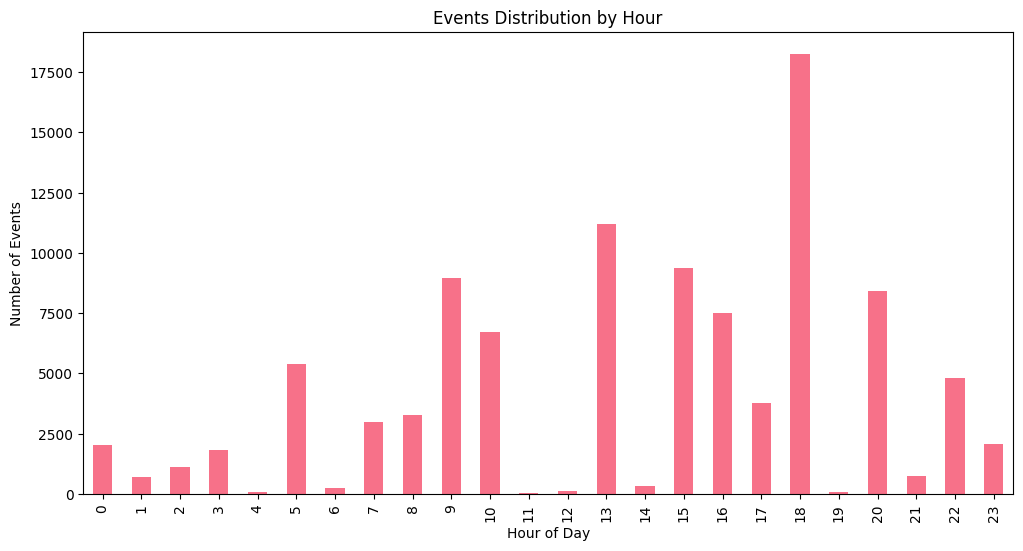

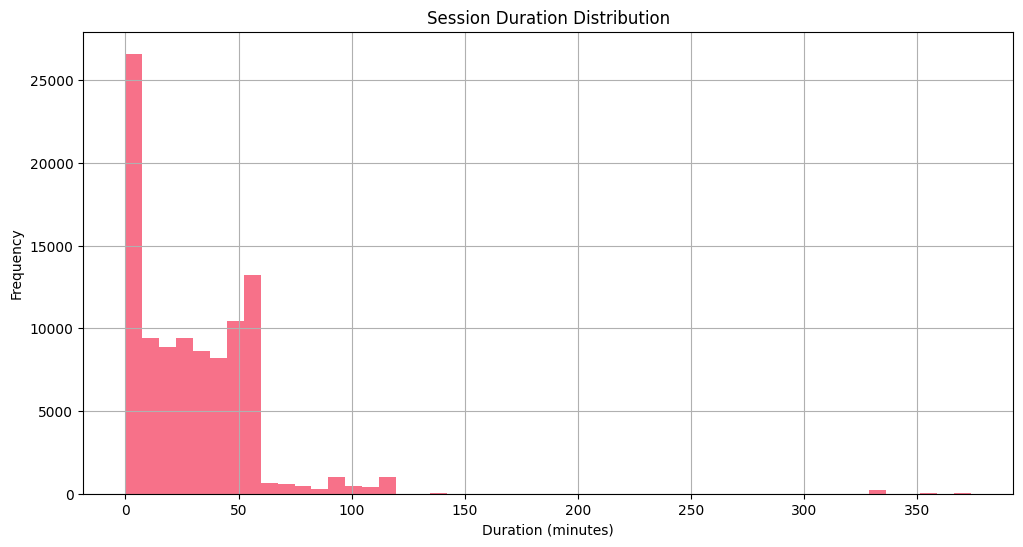

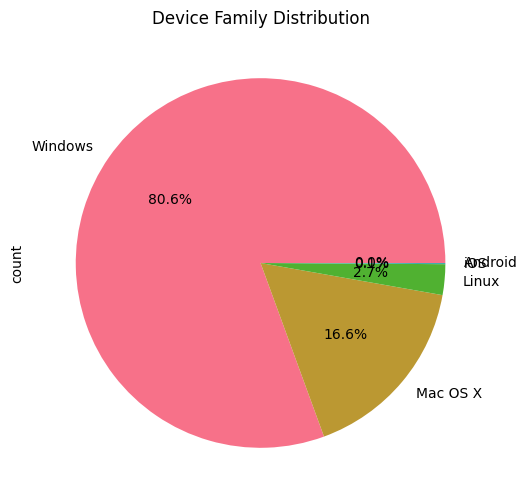

In [84]:
# 7. Create some visualizations using matplotlib
import matplotlib.pyplot as plt

# Events by Hour
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Events Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

# Session Duration Distribution
plt.figure(figsize=(12, 6))
df['session_duration'].dt.total_seconds().div(60).hist(bins=50)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Device Family Distribution
plt.figure(figsize=(10, 6))
df['device_family'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Device Family Distribution')
plt.show()

In [86]:
# 8. Statistical Summary
console.print("\n[bold bright_green]8. Statistical Summary[/bold bright_green]", style="bold")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
console.print("\n[bright_yellow]Numeric Columns Summary:[/bright_yellow]")
stats_df = df[numeric_cols].describe()
console.print(Panel(str(stats_df)))

8. Statistical Summary

Numeric Columns Summary:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│        amplitude_id       app       event_id     os_version    session_id                                       │
│ count  1.000000e+05  100000.0  100000.000000  100000.000000  1.000000e+05                                       │
│ mean   9.216176e+11  591532.0   24643.431740     130.906540  1.737116e+12                                       │
│ std    8.322225e+10       0.0   28591.589986       4.159509  8.477901e+08                                       │
│ min    8.575404e+11  591532.0       0.000000       5.000000  1.713878e+12                                       │
│ 25%    8.575405e+11  591532.0    5634.000000     131.000000  1.736745e+12                                       │
│ 50%    8.642178e+11  591532.0   14779.500000     131.000000  1.737468e+12                                       │
│ 75%    1.013472e+12  591532.0   34597.000000     131.000000  1.737577e+12                                       │
│ max    1.109989e+12  591532.0  193377.000000     134.000000  1.738044e+12                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [87]:
# 9. Correlation Analysis
console.print("\n[bold bright_green]9. Correlation Analysis[/bold bright_green]", style="bold")
if len(numeric_cols) > 1:
    correlation = df[numeric_cols].corr()
    console.print("\n[bright_yellow]Correlation Matrix:[/bright_yellow]")
    console.print(Panel(str(correlation.round(2))))

9. Correlation Analysis

Correlation Matrix:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│               amplitude_id  app  event_id  os_version  session_id                                               │
│ amplitude_id          1.00  NaN     -0.20       -0.01        0.05                                               │
│ app                    NaN  NaN       NaN         NaN         NaN                                               │
│ event_id             -0.20  NaN      1.00        0.03        0.03                                               │
│ os_version           -0.01  NaN      0.03        1.00        0.04                                               │
│ session_id            0.05  NaN      0.03        0.04        1.00                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [89]:
# 10. Category Analysis (for categorical columns)
console.print("\n[bold bright_green]10. Category Analysis[/bold bright_green]", style="bold")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    console.print(f"\n[bright_yellow]Distribution of {col}:[/bright_yellow]")
    value_counts = df[col].value_counts().head(10)  # Top 10 categories
    counts_table = Table(show_header=True, header_style="bold bright_yellow")
    counts_table.add_column("Category")
    counts_table.add_column("Count")
    counts_table.add_column("Percentage")
    
    for idx, (cat, count) in enumerate(value_counts.items()):
        percentage = (count / len(df)) * 100
        counts_table.add_row(
            str(cat),
            str(count),
            f"{percentage:.2f}%"
        )
    console.print(counts_table)

10. Category Analysis

Distribution of $insert_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ d888f0cf-d532-4925-b397-4ff9102dc90e │ 1     │ 0.00%      │
│ 20a6da41-f7c9-43c6-814c-0ba0ed1d3ec2 │ 1     │ 0.00%      │
│ 5a36c62d-daf5-470c-9ed5-489e638d7b82 │ 1     │ 0.00%      │
│ 55160d02-72d0-4215-a937-b1e15d79d8ac │ 1     │ 0.00%      │
│ fdb59f96-61dd-4caa-a151-bca07b195809 │ 1     │ 0.00%      │
│ 2378962d-bbf4-45c7-8e79-82d2cc34d3ce │ 1     │ 0.00%      │
│ e8438e79-f060-49a8-9916-f6f5dddf07e5 │ 1     │ 0.00%      │
│ 82be5cf2-cd4e-4c9b-bc12-9a53ce0d3b53 │ 1     │ 0.00%      │
│ dda51319-6b59-46ed-bc2f-f1da5fba166c │ 1     │ 0.00%      │
│ 63c9261d-d252-43ab-a0f5-92db2d4071a4 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of city:

┏━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category    ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Mumbai      │ 24090 │ 24.09%     │
│ Nashville   │ 15791 │ 15.79%     │
│ Chicago     │ 3995  │ 4.00%      │
│ Spring Hill │ 3237  │ 3.24%      │
│ Birmingham  │ 3132  │ 3.13%      │
│ Greenville  │ 2419  │ 2.42%      │
│ Alexandria  │ 1818  │ 1.82%      │
│ New York    │ 1810  │ 1.81%      │
│ Aurora      │ 1691  │ 1.69%      │
│ Wroclaw     │ 1589  │ 1.59%      │
└─────────────┴───────┴────────────┘

Distribution of country:

┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ United States  │ 71928 │ 71.93%     │
│ India          │ 24090 │ 24.09%     │
│ Poland         │ 2333  │ 2.33%      │
│ Canada         │ 1481  │ 1.48%      │
│ Mexico         │ 119   │ 0.12%      │
│ United Kingdom │ 47    │ 0.05%      │
│ Puerto Rico    │ 2     │ 0.00%      │
└────────────────┴───────┴────────────┘

Distribution of data:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ {'path': '/2/httpapi', 'group_first_event': {}, 'group_ids': {}}                           │ 98847 │ 98.85%     │
│ {'path': '/2/httpapi', 'user_properties_updated': 'True', 'group_first_event': {},         │ 1153  │ 1.15%      │
│ 'group_ids': {}}                                                                           │       │            │
└────────────────────────────────────────────────────────────────────────────────────────────┴───────┴────────────┘

Distribution of data_type:

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ event    │ 100000 │ 100.00%    │
└──────────┴────────┴────────────┘

Distribution of device_family:

┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 80578 │ 80.58%     │
│ Mac OS X │ 16640 │ 16.64%     │
│ Linux    │ 2680  │ 2.68%      │
│ iOS      │ 97    │ 0.10%      │
│ Android  │ 5     │ 0.01%      │
└──────────┴───────┴────────────┘

Distribution of device_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ a8806aff-7404-4c48-96f3-6bce38fe5f66 │ 1543  │ 1.54%      │
│ 08deb711-f4f2-40f6-8939-e1673bf4e84c │ 1367  │ 1.37%      │
│ f32dd30f-34a2-48a9-8905-cce8ab9ec449 │ 1353  │ 1.35%      │
│ d058c44e-487c-4c84-9633-6418a4c651a3 │ 1210  │ 1.21%      │
│ a8bf97c2-480e-41a2-bce9-9b54b4c10b01 │ 1100  │ 1.10%      │
│ 0e96d208-bf73-44c8-be78-a74c1123c3f9 │ 1069  │ 1.07%      │
│ 5bb73f50-5f95-4c9f-92a8-a81b65f6bda1 │ 1018  │ 1.02%      │
│ d5513ee0-9153-411e-952d-85a2e11333bc │ 1004  │ 1.00%      │
│ 3aec3262-1bdd-4f39-ae25-5df72f3fbae6 │ 980   │ 0.98%      │
│ 0c72a9b9-e5c6-4328-a4d4-cc2620ad80a0 │ 978   │ 0.98%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of device_type:

┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 80578 │ 80.58%     │
│ Linux    │ 2680  │ 2.68%      │
│ Android  │ 5     │ 0.01%      │
└──────────┴───────┴────────────┘

Distribution of dma:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                           ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Nashville, TN                      │ 19349 │ 19.35%     │
│ Chicago, IL                        │ 4864  │ 4.86%      │
│ New York, NY                       │ 4656  │ 4.66%      │
│ Greenville-Spartanburg, SC         │ 3888  │ 3.89%      │
│ Atlanta, GA                        │ 3705  │ 3.71%      │
│ Birmingham, AL                     │ 3412  │ 3.41%      │
│ Des Moines-Ames, IA                │ 3343  │ 3.34%      │
│ Washington, DC (Hagerstown, MD)    │ 3158  │ 3.16%      │
│ San Francisco-Oakland-San Jose, CA │ 2108  │ 2.11%      │
│ Columbus, OH                       │ 1570  │ 1.57%      │
└────────────────────────────────────┴───────┴────────────┘

Distribution of event_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ {}                                                                                         │ 7329  │ 7.33%      │
│ {'rowModel': 'client', 'slug': 'documents-and-compliance-table'}                           │ 981   │ 0.98%      │
│ {'slug': 'general'}                                                                        │ 297   │ 0.30%      │
│ {'slug': 'my-book'}                                                                        │ 296   │ 0.30%      │
│ {'displayName': 'Basic Vehicle Details (Policy)', 'tableId':                               │ 227   │ 0.23%      │
│ 'de54a567-d72b-44a9-8658-15c4a0299738', 'id': 'b87fadc2-83ff-4d76-b940-3dd78d0df21f',      │       │            │
│ 'type': 'table'}                                                                           │       │            │
│ {'rowModel': 'client', 'id': 'de54a567-d72b-44a9-8658-15c4a0299738'}                       │ 227   │ 0.23%      │
│ {'rowModel': 'legacyServer', 'slug': 'submission-history'}                                 │ 225   │ 0.22%      │
│ {'slug': 'auto'}                                                                           │ 196   │ 0.20%      │
│ {'displayName': 'Policy Detail Card', 'id': 'e59fbad1-399d-41fe-9c99-f4158e175c01',        │ 185   │ 0.18%      │
│ 'type': 'built-in', 'slug': 'policy-detail-card'}                                          │       │            │
│ {'rowModel': 'client', 'slug': 'recent-actions'}                                           │ 172   │ 0.17%      │
└────────────────────────────────────────────────────────────────────────────────────────────┴───────┴────────────┘

Distribution of event_time:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 2024-06-27 13:48:19.271000 │ 28    │ 0.03%      │
│ 2024-04-23 13:09:22.416000 │ 21    │ 0.02%      │
│ 2024-09-10 04:43:50.596000 │ 20    │ 0.02%      │
│ 2024-05-16 01:53:12.545000 │ 18    │ 0.02%      │
│ 2024-12-19 19:03:01.542000 │ 15    │ 0.01%      │
│ 2025-01-09 22:03:11.339000 │ 8     │ 0.01%      │
│ 2025-01-09 22:21:08.923000 │ 7     │ 0.01%      │
│ 2024-08-12 17:16:07.950000 │ 7     │ 0.01%      │
│ 2025-01-22 20:56:34.043000 │ 7     │ 0.01%      │
│ 2025-01-22 15:40:13.340000 │ 6     │ 0.01%      │
└────────────────────────────┴───────┴────────────┘

Distribution of event_type:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                    ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ account-lines::widget:render                │ 23202 │ 23.20%     │
│ account-lines::configurable-table:render    │ 14309 │ 14.31%     │
│ account-lines:::view                        │ 5775  │ 5.78%      │
│ account-lines::layout:render                │ 5656  │ 5.66%      │
│ dashboard:my-book:configurable-table:render │ 5468  │ 5.47%      │
│ dashboard:my-book:widget:render             │ 5135  │ 5.13%      │
│ account:::view                              │ 3423  │ 3.42%      │
│ session_start                               │ 3186  │ 3.19%      │
│ session_end                                 │ 2794  │ 2.79%      │
│ application-window-opened                   │ 2687  │ 2.69%      │
└─────────────────────────────────────────────┴───────┴────────────┘

Distribution of language:

┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ English  │ 98942 │ 98.94%     │
│ Polish   │ 939   │ 0.94%      │
│ Spanish  │ 119   │ 0.12%      │
└──────────┴───────┴────────────┘

Distribution of library:

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category           ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ amplitude-ts/2.7.2 │ 100000 │ 100.00%    │
└────────────────────┴────────┴────────────┘

Distribution of os_name:

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category      ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Chrome        │ 93012 │ 93.01%     │
│ Edge          │ 6260  │ 6.26%      │
│ Firefox       │ 602   │ 0.60%      │
│ Mobile Safari │ 97    │ 0.10%      │
│ Safari        │ 24    │ 0.02%      │
│ Chrome Mobile │ 5     │ 0.01%      │
└───────────────┴───────┴────────────┘

Distribution of platform:

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Web      │ 100000 │ 100.00%    │
└──────────┴────────┴────────────┘

Distribution of region:

┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Maharashtra    │ 24090 │ 24.09%     │
│ Tennessee      │ 20352 │ 20.35%     │
│ Illinois       │ 5369  │ 5.37%      │
│ South Carolina │ 4106  │ 4.11%      │
│ Georgia        │ 4059  │ 4.06%      │
│ California     │ 3773  │ 3.77%      │
│ Iowa           │ 3692  │ 3.69%      │
│ Virginia       │ 3537  │ 3.54%      │
│ Alabama        │ 3412  │ 3.41%      │
│ Florida        │ 3164  │ 3.16%      │
└────────────────┴───────┴────────────┘

Distribution of user_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 0c4896b7-08fa-4cb4-852f-27ad584f0864 │ 2888  │ 2.89%      │
│ EMPTY                                │ 2707  │ 2.71%      │
│ 1b992a40-b2c3-4b69-a5bc-05711eeddd80 │ 2318  │ 2.32%      │
│ 1b7f0cbc-e5b9-494f-af08-f8e19df60576 │ 1543  │ 1.54%      │
│ cfa20420-326e-4d5a-b202-c04084e785ad │ 1367  │ 1.37%      │
│ bb8fa1af-a540-4d0f-a633-569c61f01281 │ 1360  │ 1.36%      │
│ 96521245-b6a9-4393-a42e-3e8e470f5e5f │ 1353  │ 1.35%      │
│ a883990d-2aa3-4644-9511-5f1c035717f2 │ 1210  │ 1.21%      │
│ d367faa8-7f10-4ffe-a216-c14b880a4d60 │ 1100  │ 1.10%      │
│ 8dbcce7d-02e8-4556-b917-f5d3393bf859 │ 1069  │ 1.07%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of user_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ {'businessUnit': [], 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',   │ 28385 │ 28.38%     │
│ 'initial_utm_content': 'EMPTY', 'roles': ['underwriter'], 'isInternalUser': 'False',       │       │            │
│ 'trackingVersion': '3.1', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY',      │       │            │
│ 'initial_li_fat_id': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',                │       │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',        │       │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY',          │       │            │
│ 'initial_gbraid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_msclkid': 'EMPTY',        │       │            │
│ 'initial_ttclid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}    │       │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1', 'initial_twclid': │ 8167  │ 8.17%      │
│ 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None', 'initial_utm_source': 'EMPTY',      │       │            │
│ 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_rtd_cid': 'EMPTY',           │       │            │
│ 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_msclkid': 'EMPTY',          │       │            │
│ 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'initial_utm_medium': 'EMPTY',  │       │            │
│ 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'isInternalUser':     │       │            │
│ 'False', 'initial_utm_campaign': 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer':        │       │            │
│ 'https://accounts.google.com/', 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY',    │       │            │
│ 'initial_utm_term': 'EMPTY', 'referring_domain': 'accounts.google.com'}                    │       │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1', 'initial_twclid': │ 5908  │ 5.91%      │
│ 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None', 'initial_utm_source': 'EMPTY',      │       │            │
│ 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_rtd_cid': 'EMPTY',           │       │            │
│ 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_msclkid': 'EMPTY',          │       │            │
│ 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'initial_utm_medium': 'EMPTY',  │       │            │
│ 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'isInternalUser':     │       │            │
│ 'False', 'initial_utm_campaign': 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer':        │       │            │
│ 'https://vru-auth.us.auth0.com/', 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY',  │       │            │
│ 'initial_utm_term': 'EMPTY', 'referring_domain': 'vru-auth.us.auth0.com'}                  │       │            │
│ {'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'businessUnit': [],   │ 4517  │ 4.52%      │
│ 'initial_utm_content': 'EMPTY', 'roles': ['underwriter'], 'isInternalUser': 'False',       │       │            │
│ 'initial_utm_campaign': 'EMPTY', 'trackingVersion': '3.1', 'initial_twclid': 'EMPTY',      │       │            │
│ 'initial_gclid': 'EMPTY', 'hostname': 'None', 'initial_utm_source': 'EMPTY',               │       │            │
│ 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY',            │       │            │
│ 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY'

Distribution of uuid:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 28df7af3-96e9-4543-98d1-1abac8c15f59 │ 1     │ 0.00%      │
│ 040a449c-abba-44cc-94d8-4aded6e60d9c │ 1     │ 0.00%      │
│ ec1c8616-e2ab-4baf-80cf-6390785ac0eb │ 1     │ 0.00%      │
│ cbe8cf0f-371a-46e4-a757-e3900e69a74b │ 1     │ 0.00%      │
│ c008ee47-1450-4728-b18c-4c03d587cafa │ 1     │ 0.00%      │
│ 57a2dacb-c649-42b3-b56c-6c48d18a7788 │ 1     │ 0.00%      │
│ f6b58944-bea7-4311-8d79-bb6012460875 │ 1     │ 0.00%      │
│ e200ac98-0a04-4b2c-86d8-2adffd60fc0a │ 1     │ 0.00%      │
│ 636b56a7-c290-4b0e-b44a-e90ac2bb10c5 │ 1     │ 0.00%      │
│ 97cad9db-7dec-48a9-9070-53fddb8bc603 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of day_of_week:

┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category  ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ Monday    │ 28546 │ 28.55%     │
│ Wednesday │ 22741 │ 22.74%     │
│ Thursday  │ 20559 │ 20.56%     │
│ Tuesday   │ 18909 │ 18.91%     │
│ Friday    │ 6582  │ 6.58%      │
│ Saturday  │ 1736  │ 1.74%      │
│ Sunday    │ 927   │ 0.93%      │
└───────────┴───────┴────────────┘

In [96]:
# 11. Data Quality Checks
console.print("\n[bold bright_green]11. Data Quality Checks[/bold bright_green]", style="bold")
quality_table = Table(show_header=True, header_style="bold bright_yellow")
quality_table.add_column("Check")
quality_table.add_column("Result")

duplicates = df.duplicated().sum()
quality_table.add_row(
    "Duplicate Rows",
    f"[bright_yellow]{duplicates}[/bright_yellow]" if duplicates > 0 else "[bright_green]0[/bright_green]"
)

missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
has_missing = missing_pct.any()
quality_table.add_row(
    "Contains Missing Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_missing else "[bright_green]No[/bright_green]"
)

numeric_zeros = {col: (df[col] == 0).sum() for col in numeric_cols}
has_zeros = any(numeric_zeros.values())
quality_table.add_row(
    "Contains Zero Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_zeros else "[bright_green]No[/bright_green]"
)

console.print(quality_table)

11. Data Quality Checks

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Check                   ┃ Result ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Duplicate Rows          │ 0      │
│ Contains Missing Values │ Yes    │
│ Contains Zero Values    │ Yes    │
└─────────────────────────┴────────┘

In [97]:
# 12. Memory Usage
console.print("\n[bold bright_green]12. Memory Usage[/bold bright_green]", style="bold")
memory_usage = df.memory_usage(deep=True)
total_memory = memory_usage.sum() / 1024**2
console.print(Panel(f"Total Memory Usage: {total_memory:.2f} MB"))


12. Memory Usage

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Total Memory Usage: 220.63 MB                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯